In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Insert your features and labels
features = np.load(r'D:\PAVAN\SEMESTER-5\ML\activation_maps_lines_image52_labelpixel.npy')
samples = np.load(r'D:\PAVAN\SEMESTER-5\ML\activation_maps_lines_image52_pixel.npy')

In [2]:
#Creating a table
table = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

dataframe = pd.DataFrame(table, index= [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
print(dataframe)

        age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no


In [3]:
# Converting  categorical features to numerical using Label Encoding
label_Encoder = LabelEncoder()

for column in dataframe.columns:
    dataframe[column] = label_Encoder.fit_transform(dataframe[column])

# Separate attributes  and target
attributes = dataframe.drop(columns=['buys_computer'])
target = dataframe['buys_computer']

# Split the data into training and testing sets
Train_attribute, Test_attribute, Train_target, Test_target = train_test_split(attributes, target, test_size=0.2, random_state=42)

In [4]:
# Function to calculate entropy before
def entropy_before(value):
    class_labels = value.unique()
    entropy = 0
    total_attributes = len(value)

    for label in class_labels:
        p = len(value[value == label]) / total_attributes
        entropy -= p * np.log2(p)

    return entropy

In [5]:
# Function to calculation entropy after
def entropy_after(values,target):
    total_attributes = len(values)
    weighted_entropy = 0

    for value in values.unique():
        positive_indices = values[values == value].index
        positive_target = target[positive_indices]
        positive_attributes = len(positive_indices)
        weighted_entropy += (positive_attributes / total_attributes) * entropy_before(positive_target)
    return weighted_entropy

In [6]:
#Function to calculate Information gain
def information_gain(value,target):
    entropy_before_split = entropy_before(target)
    entropy_after_split = entropy_after(value,target)
    info_gain = entropy_before_split - entropy_after_split
    return info_gain 
    

In [7]:
# Calculate entropy and information gain for each feature
features_table = attributes.columns  # Use the column names of X as features
information_gains = {}

for feature in features_table:
    information_gains[feature] = information_gain(attributes[feature],target)
    print(f"Information Gain for {feature}: {information_gains[feature]}")

Information Gain for age: 0.24674981977443933
Information Gain for income: 0.02922256565895487
Information Gain for student: 0.15183550136234159
Information Gain for credit_rating: 0.04812703040826949


In [8]:
#function to find the root node
def root_node(value):
    feature = max(value,key=value.get)
    return feature

root_node = root_node(information_gains)
print("feature selcted for the decision tree is:",root_node)


feature selcted for the decision tree is: age


In [9]:
# Question A2
# Create and fit the Decision Tree model
table_model = DecisionTreeClassifier()
table_model.fit(Train_attribute, Train_target)

# Calculate the depth of the constructed tree
table_treedepth = table_model.get_depth()
print(f"The depth of the constructed Decision Tree is: {table_treedepth}")

The depth of the constructed Decision Tree is: 4


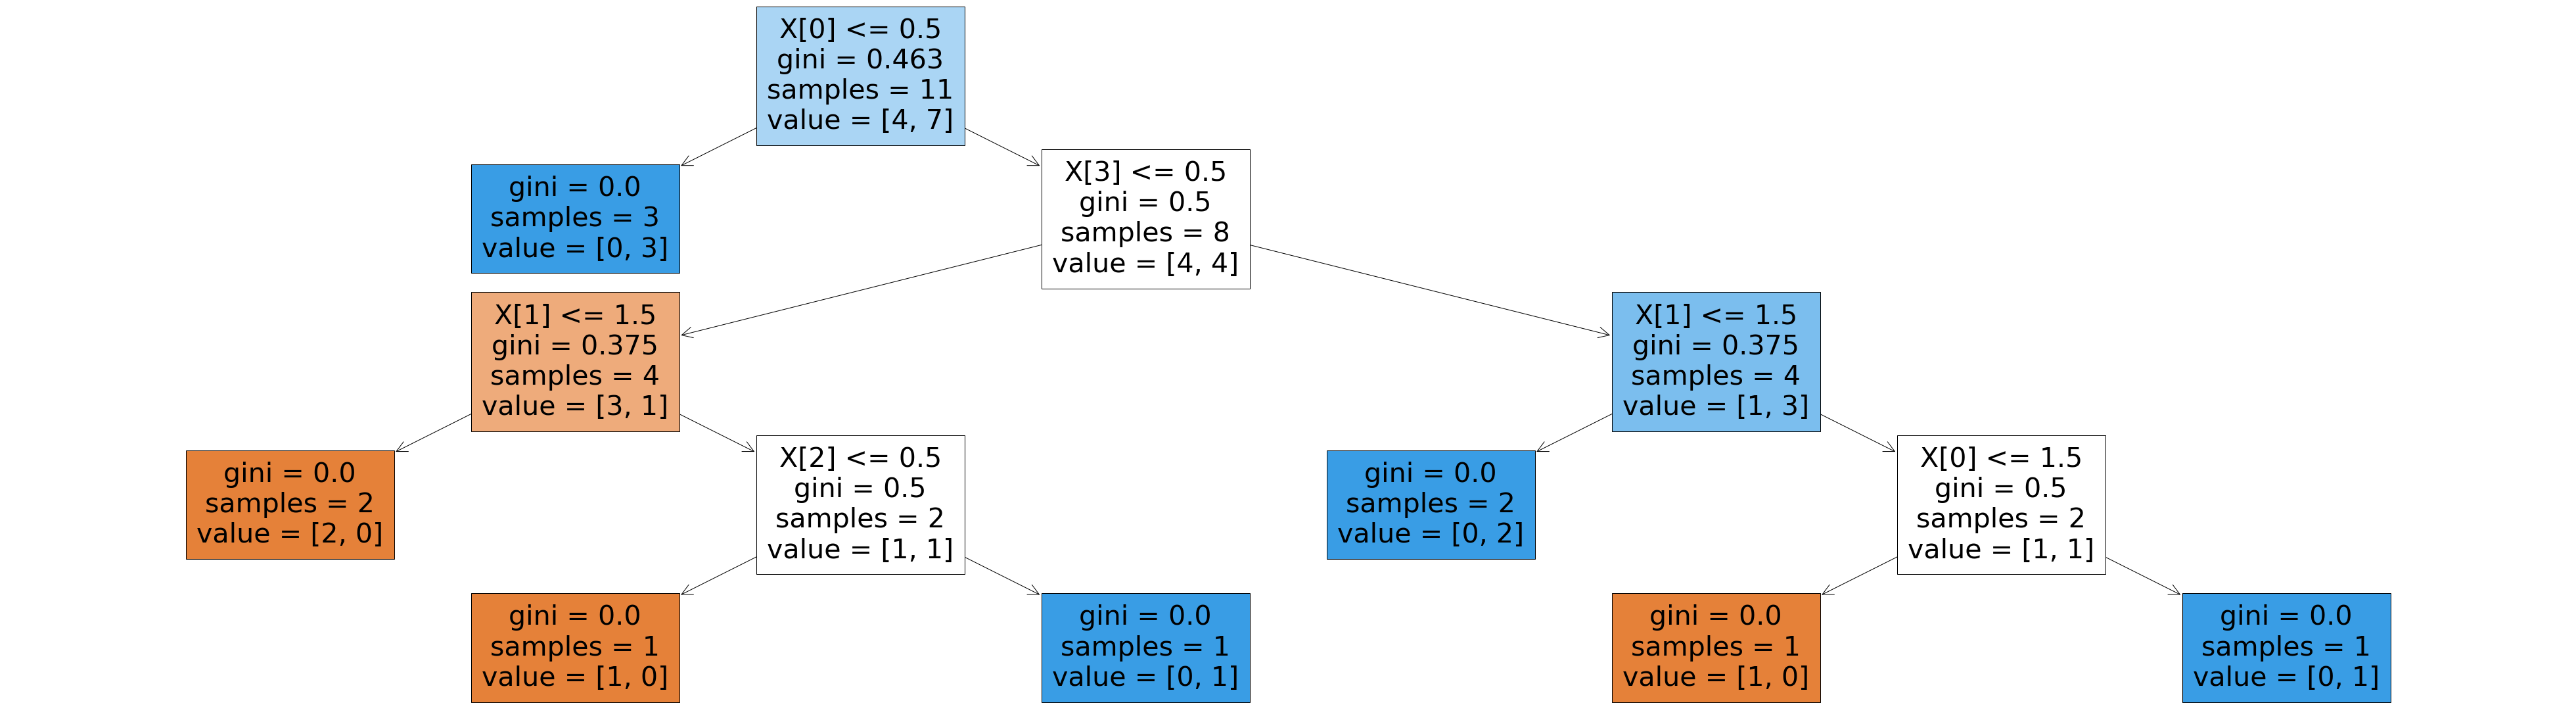

In [10]:
# Question A3
# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(table_model, filled=True)
plt.show()

In [11]:
# Calculate the accuracy on the training set
table_train_accuracy = table_model.score(Train_attribute, Train_target)
print(f"Training Set Accuracy: {table_train_accuracy}")

# Calculate the accuracy on the test set
table_test_accuracy = table_model.score(Test_attribute,Test_target)
print(f"Test Set Accuracy: {table_test_accuracy}")


Training Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


In [12]:
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask


In [13]:
# Question A4
samples_df = pd.DataFrame(samples,columns=np.arange(0,13))
samples_df['13']=features # Adding features coulmn into the samples dataset 

# Split the reshaped data into training and testing sets
data_train, data_test, output_train, output_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

In [14]:
# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(data_train, output_train)

# Calculate the depth of the constructed tree
treedepth = model.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth}")

# Calculate the accuracy on the training set
train_accuracy = model.score(data_train, output_train)
print(f"Training Set Accuracy: {train_accuracy}")

# Calculate the accuracy on the test set
test_accuracy = model.score(data_test,output_test)
print(f"Test Set Accuracy: {test_accuracy}")

dec_data_pred = model.predict(data_test)

matrix_dt = confusion_matrix(output_test, dec_data_pred)
print("The confusion matrix is:\n",matrix_dt)

print("The performance matrix:\n",classification_report(output_test, dec_data_pred))

The depth of the constructed Decision Tree is: 29
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.4809276777540433
The confusion matrix is:
 [[ 188   10   39  699]
 [  19    0    4  103]
 [  57    2   19  298]
 [ 341   22  107 1369]]
The performance matrix:
               precision    recall  f1-score   support

           0       0.31      0.20      0.24       936
           1       0.00      0.00      0.00       126
         128       0.11      0.05      0.07       376
         255       0.55      0.74      0.64      1839

    accuracy                           0.48      3277
   macro avg       0.24      0.25      0.24      3277
weighted avg       0.41      0.48      0.43      3277



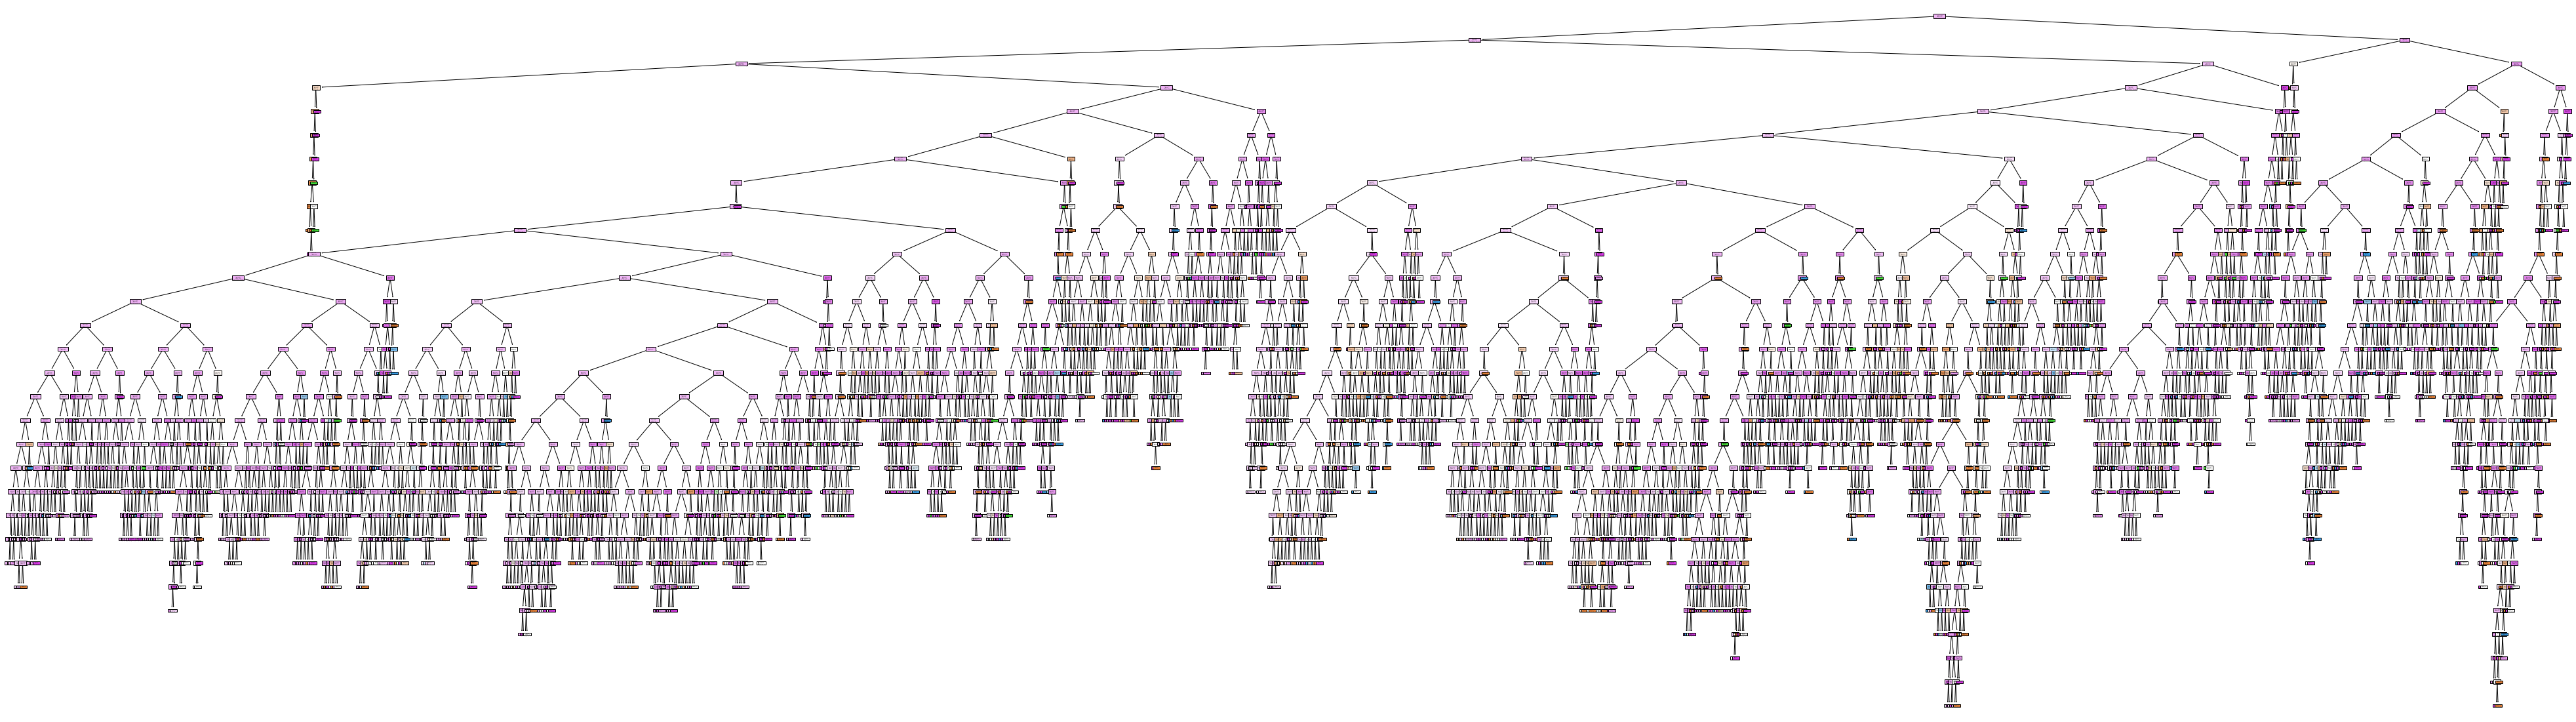

In [23]:
# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()

In [15]:
#Question A5
model_max_depth = DecisionTreeClassifier(max_depth=5)
model_max_depth.fit(data_train, output_train)

# Calculate the depth of the constructed tree
treedepth_max_depth = model_max_depth.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth_max_depth}")

# Calculate the accuracy on the training set
train_accuracy_max_depth = model_max_depth.score(data_train, output_train)
print(f"Training Set Accuracy: {train_accuracy_max_depth}")

# Calculate the accuracy on the test set
test_accuracy_max_depth = model_max_depth.score(data_test,output_test)
print(f"Test Set Accuracy: {test_accuracy_max_depth}")


The depth of the constructed Decision Tree is: 5
Training Set Accuracy: 0.5551232166018158
Test Set Accuracy: 0.561184009765029


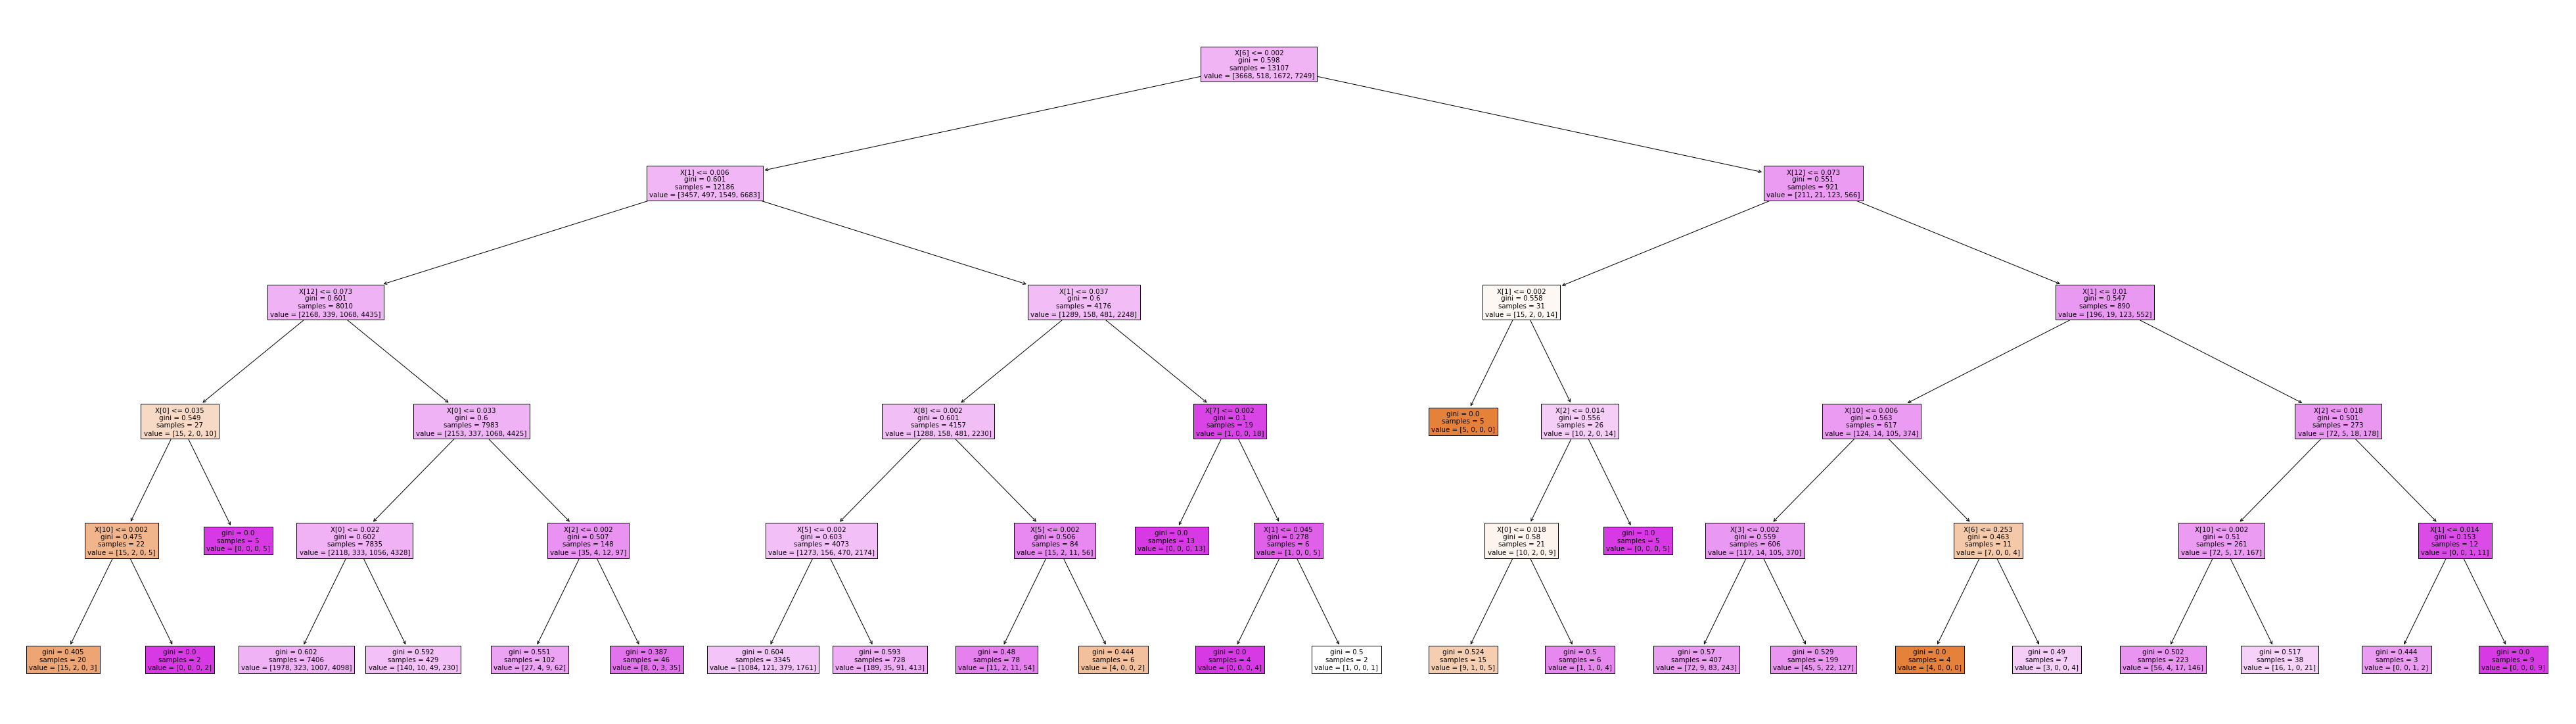

In [22]:
# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model_max_depth, filled=True)
plt.show()

In [16]:
#Question A6
model_criteria = DecisionTreeClassifier(criterion='entropy')
model_criteria.fit(data_train, output_train)

# Calculate the depth of the constructed tree
treedepth_criteria = model_criteria.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth_criteria}")

# Calculate the accuracy on the training set
train_accuracy_criteria = model_criteria.score(data_train, output_train)
print(f"Training Set Accuracy: {train_accuracy_criteria}")

# Calculate the accuracy on the test set
test_accuracy_criteria = model_criteria.score(data_test,output_test)
print(f"Test Set Accuracy: {test_accuracy_criteria}")

The depth of the constructed Decision Tree is: 29
Training Set Accuracy: 0.6554512855725948
Test Set Accuracy: 0.4705523344522429


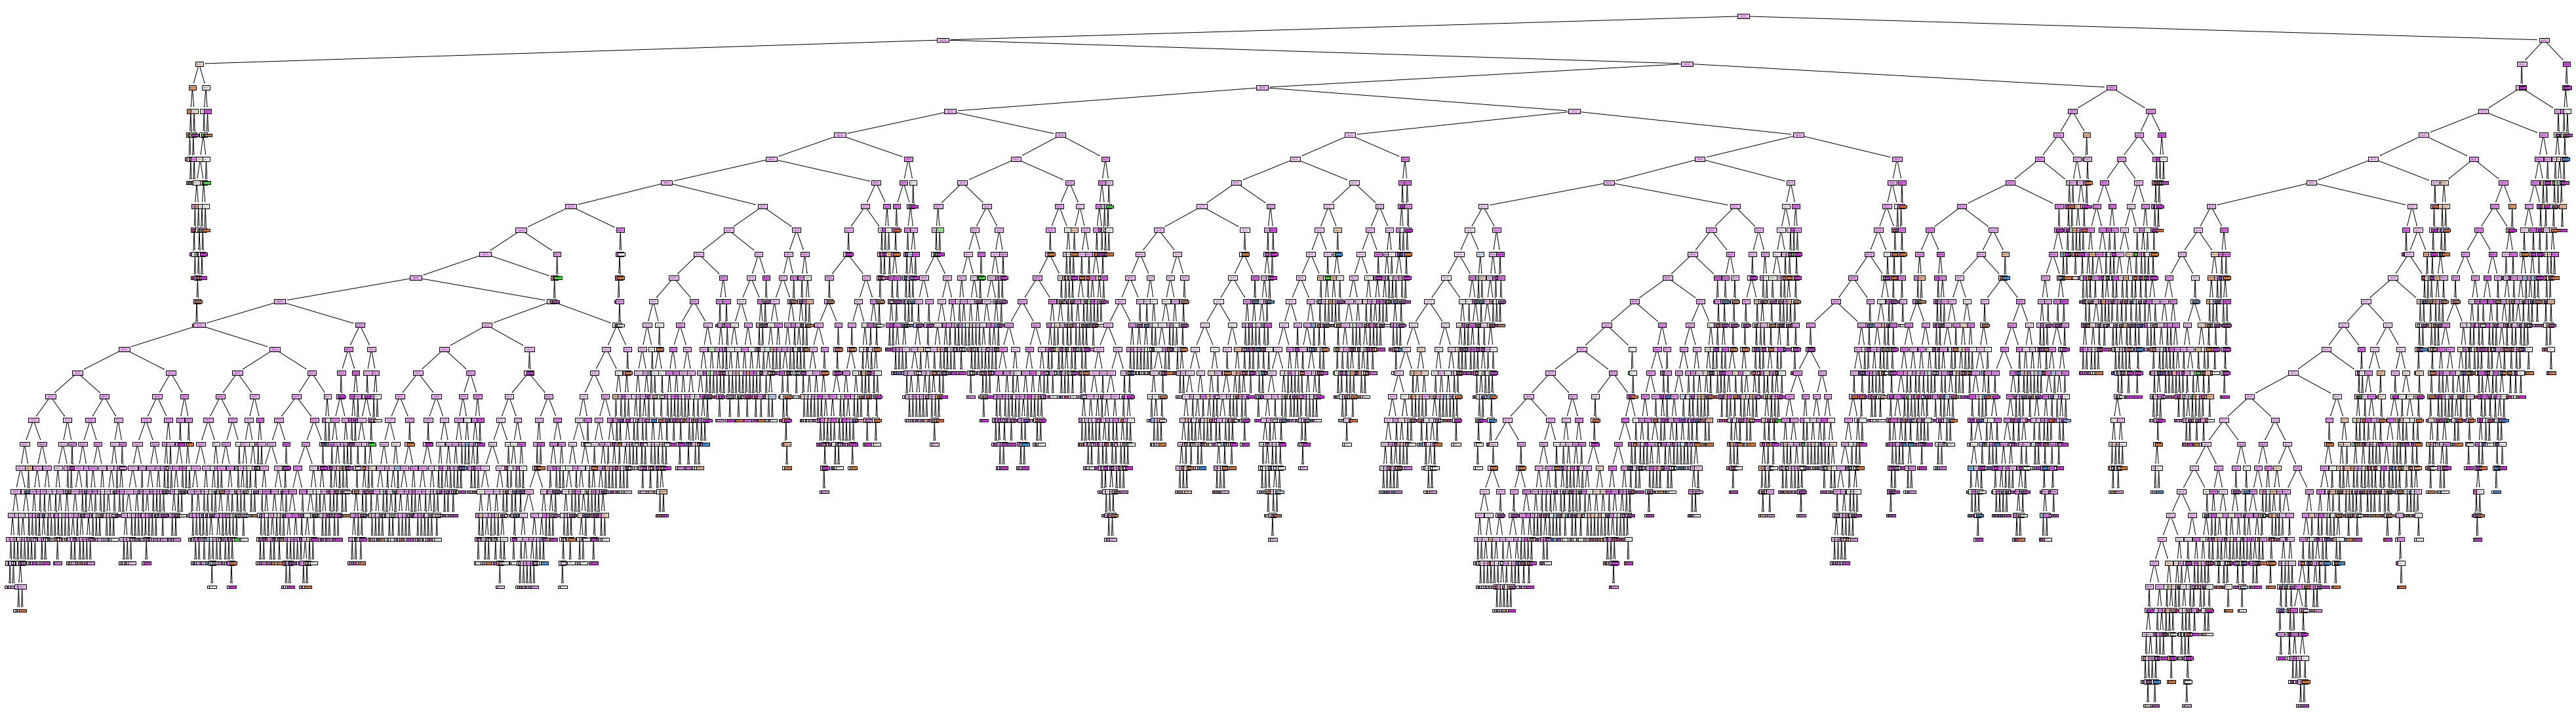

In [17]:
# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model_criteria, filled=True)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest_data_train = data_train
forest_data_test = data_test
forest_output_train = output_train
forest_output_test = output_test
model_forest = RandomForestClassifier(n_estimators=50)
model_forest.fit(forest_data_train, forest_output_train)
output_forest_for_data_pred = model_forest.predict(forest_data_test)
accuracy_random_forest = metrics.accuracy_score(forest_output_test, output_forest_for_data_pred)
print("The accuracy of the random forest is: ", accuracy_random_forest, "\n")

The accuracy of the random forest is:  0.5099176075678975 



In [20]:
# Generate predictions with the best model
# Create the confusion matrix
cm_RT = confusion_matrix(forest_output_test, output_forest_for_data_pred)
print("The Confusion matrix is:\n",cm_RT)

The Confusion matrix is:
 [[ 137    3   24  772]
 [  14    0    5  107]
 [  36    1   13  326]
 [ 237    7   74 1521]]


In [21]:
print("The performance matrix is :\n",classification_report(forest_output_test, output_forest_for_data_pred))

The performance matrix is :
               precision    recall  f1-score   support

           0       0.32      0.15      0.20       936
           1       0.00      0.00      0.00       126
         128       0.11      0.03      0.05       376
         255       0.56      0.83      0.67      1839

    accuracy                           0.51      3277
   macro avg       0.25      0.25      0.23      3277
weighted avg       0.42      0.51      0.44      3277

